In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Post_BEAGLE_Analysis import *
from Helper_Functions import *

In [33]:
bgl_output = Beagle_Output('results/TEST_Input_Flux/1395_BEAGLE.fits.gz')

In [9]:
nirspec_data = Table.read('data/spectra/1395_TEST_Input_Flux.fits')
wave, flux, fluxerr = nirspec_data['wav'], nirspec_data['flux'], nirspec_data['fluxerr']

(-1e-20, 1.5e-20)

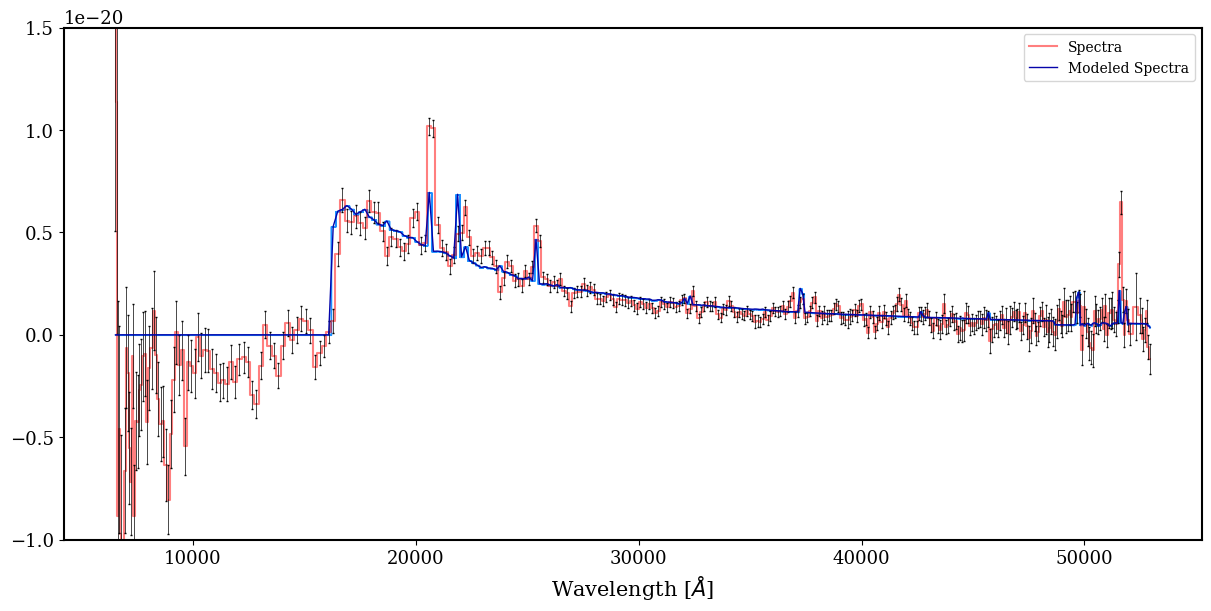

In [34]:
fig, ax = bgl_output.plotting_model_spectra_w_actual_spectra(wave*1e10, flux, fluxerr)
ax.set_ylim(-1e-20, 1.5e-20)

In [4]:
# marg_l16, marg_med, marg_u84 = np.percentile(bgl_output['marg_sed'], q = (16, 50, 84), axis = 0)

In [3]:
# fig, ax = bgl_output.plot_convolved_spectra_with_actual_spectra(R_wave_angstrom, tb['flux'], tb['fluxerr'])
# #ax.step(bgl_output['marg_wvln'],marg_med, color = 'blue', alpha = 0.5, label = 'Marginal SED Fit')
# ax.fill_between(bgl_output['marg_wvln'], marg_u84, marg_l16)
# ax.set_ylim(-0.1e-19, 0.2e-19)
# ax.set_xlim(0, 100000)
# ax.axhline(0, ls = '--', color = 'black')
# ax.legend()

In [20]:
# fig, ax = bgl_output.plot_convolved_spectra_with_actual_spectra(R_wave_angstrom, tb['flux'], tb['fluxerr'])
# ax.set_ylim(-0.1e-19, 0.2e-19)
# ax.set_xlim(0, 100000)
# ax.axhline(0)

In [18]:
real_wave = tb['wav']
real_flux = tb['flux']
real_fluxerr = tb['fluxerr']

In [47]:
def chi2_array(model_arr, flux, fluxerr, free_params = 10):

    chi2_arr = []
    #twod_chi2_array = []
    
    for model in model_arr:

        chi2 = np.sum(((model - flux)/fluxerr)**2)
        
        chi2_arr.append(chi2)
        
    reduced_chi2 = np.array(chi2_arr)*(len(flux) - free_params)**-1

    chi2_per_pixel = np.sum(((model_arr - flux)/fluxerr)**2, axis = 0)
    
    
    return reduced_chi2, chi2_per_pixel/(len(chi2_per_pixel))

In [21]:
# #line = 4863
# #window = 70
# min = line - window 
# max = line + window

# plt.figure(figsize = (12, 7), facecolor = 'white')
# plt.step(rest_frame_wave, chi2_per_pixel, color = 'gray')
# plt.xlabel('Rest Frame Wavelength [Ansgtroms]', fontsize = 15)
# plt.ylabel("Chi2", fontsize = 15)
# #plt.yscale('log')
# plt.axhline(1, color = 'black', ls = '--', label = 'Chi2 = 1')
# plt.axhline(10, color = 'purple', ls = '--', label = 'Chi2 = 10')
# #plt.axhline(100, color = 'blue', ls = '--', label = 'Chi2 = 100')
# plt.legend()
# plt.ylim(0, 50)
# #plt.axvline(line, color = 'gray', ls = '--')
# plt.show()

In [22]:
# idx_in_range = np.where(((R_wave_angstrom[0] < full_obs_sed_wvln) & (full_obs_sed_wvln < R_wave_angstrom[-1])))

In [73]:
agn_ratio_convolved = bgl_output['convolved_agn']/bgl_output['convolved_spectra']

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_2278/4154230854.py:1: RuntimeWarning: invalid value encountered in divide
  agn_ratio_convolved = bgl_output['convolved_agn']/bgl_output['convolved_spectra']


In [74]:
l16, med, u84 = np.percentile(agn_ratio_convolved, q = (16, 50, 84), axis = 0)

In [ ]:
# line = 6564
# width = 100

# plt.figure(figsize = (10, 5), facecolor = 'white', constrained_layout = True)
# plt.step(bgl_output['convolved_wave'], bgl_output['convolved_spectra'][0], label = 'Convolved Full SED')
# plt.step(bgl_output['convolved_wave'], bgl_output['convolved_agn'][0],     label = 'Convolved AGN SED')
# #plt.step(bgl_output['convolved_wave'], med, color = 'black')
# plt.step(tb['wav']*1e10, tb['flux']*15, color = 'red')
# plt.xlim(line*(1+z) - width*(1+z), line*(1+z) + width*(1+z))
# plt.ylim(-.1e-18, 0.2e-18)
# plt.legend()
# plt.show()

In [75]:
flux = bgl_output.convolve_model_spec(R_wave_angstrom, R, 
                                       full_obs_sed_wvln[idx_in_range], bgl_output['full_sed'][0][idx_in_range], 
                                       R_wave_angstrom)

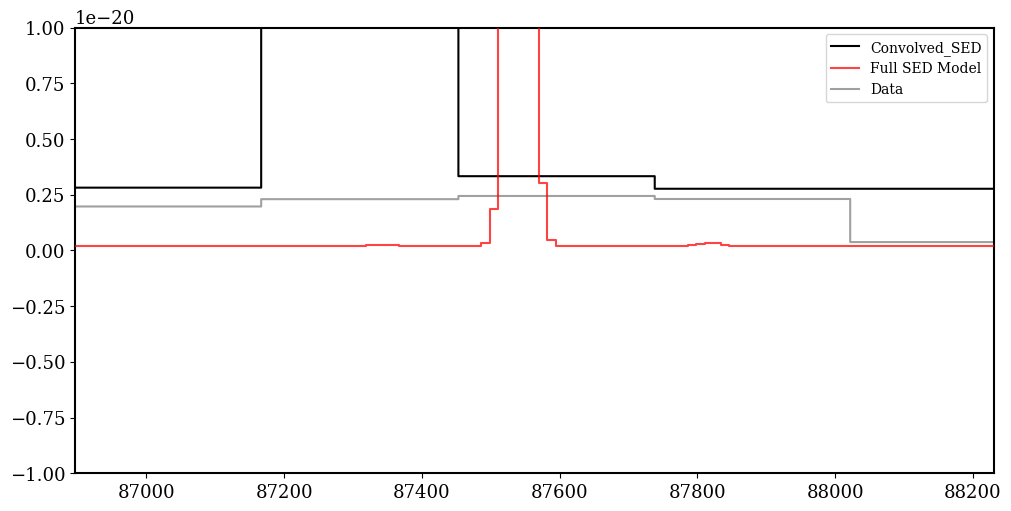

In [77]:
line = 6564
width = 50

plt.figure(figsize = (10, 5), facecolor = 'white', constrained_layout = True)
plt.step(R_wave_angstrom, flux/(1+z), label = 'Convolved_SED', zorder = 10, color = 'black')
plt.step(full_obs_sed_wvln, bgl_output['full_sed'][0]/(1+z), label = 'Full SED Model', color = 'red', zorder = 12, alpha = 0.74)
#plt.step(full_obs_sed_wvln, bgl_output['full_sed'][0], label = 'OG Model')
plt.step(tb['wav']*1e10, tb['flux'], color = 'gray', label = "Data", alpha = 0.75)
plt.xlim(20000, 100000)
plt.xlim(line*(1+z) - width*(1+z), line*(1+z) + width*(1+z))
plt.ylim(-.1e-19, .1e-19)
plt.legend()
plt.show()

In [25]:
def grab_spectral_region(data_wave, data_flux, line_wave, window):

    min_window = line_wave - window
    max_window = line_wave + window
    idx = np.where((min_window < data_wave) & (data_wave < max_window))[0]

    wave = data_wave[idx]
    flux = data_flux[idx]
    
    return wave, flux

In [31]:
def plot_spectra_and_zoom_ins(bgl_output, data_wave, data_flux, data_flux_err):

    rest_wave = bgl_output['marg_wvln']/(1+bgl_output['z'])
    
    
    l16, med, u84 = np.percentile(bgl_output['marg_sed'], q = (16, 50, 84), axis = 0)

    # Create a figure
    fig = plt.figure(figsize=(15, 10))
    
    # Create a grid with 3 rows and 4 columns using gridspec
    gs = fig.add_gridspec(3, 4)
    
    # Top row: single long plot spanning all 4 columns
    ax1 = fig.add_subplot(gs[0, :])  # Span all columns in the first row
    ax1.step(bgl_output['marg_wvln'], med, color = 'purple', label = 'Model Fit', zorder = 10)

    
    ax1.step(data_wave, data_flux, color = 'gray', label = "Data")
    ax1.errorbar(data_wave, data_flux, yerr = data_flux_err, color = 'red', fmt = 'none')
    ax1.set_ylim(-0.5e-20, 1e-20)
    ax1.legend(fontsize = 15)
    data_wave = data_wave/(1+bgl_output['z'])
    # Second row: 4 plots
    line1 = 1215.67 #lya
    window1 = 40
    ax2 = fig.add_subplot(gs[1, 0])

    wave, lflux = grab_spectral_region(rest_wave, l16, line1, window1)
    wave, flux = grab_spectral_region(rest_wave, med, line1, window1)
    wave, uflux = grab_spectral_region(rest_wave, u84, line1, window1)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line1, window1)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line1, window1)
    
    ax2.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5, label = 'Model')
    ax2.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    ax2.step(wave_data, flux_data, where = 'mid', color = 'black', label = 'Data')
    ax2.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')

    
    ax2.set_xlabel('')
    ax2.set_title(r'Ly$\alpha$', fontsize = 15)
    ax2.minorticks_on()
    ax2.legend()
    #(x, y3)
    
    #ax2.set_title('tan(x)')
    line2 = 1549 #CIV
    window2 = 40
    ax3 = fig.add_subplot(gs[1, 2])
    wave, lflux = grab_spectral_region(rest_wave, l16, line2, window2)
    wave, flux = grab_spectral_region(rest_wave, med, line2, window2)
    wave, uflux = grab_spectral_region(rest_wave, u84, line2, window2)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line2, window2)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line2, window2)
    
    ax3.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax3.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax3.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax3.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax3.set_ylabel('')
    ax3.set_xlabel('')
    ax3.set_title('C IV', fontsize = 15)
    ax3.minorticks_on()
    #ax3.legend()
    
    #ax3.plot(x, y4)
    #ax3.set_title('sinh(x)')
    
    line3 = 1640 #HeII
    window3 = 40
    ax4 = fig.add_subplot(gs[1, 3])
    
    wave, lflux = grab_spectral_region(rest_wave, l16, line3, window3)
    wave, flux = grab_spectral_region(rest_wave, med, line3, window3)
    wave, uflux = grab_spectral_region(rest_wave, u84, line3, window3)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line3, window3)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line3, window3)
   
    ax4.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax4.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax4.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax4.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax4.set_ylabel('')
    ax4.set_xlabel('')
    ax4.set_title('He II', fontsize = 15)
    ax4.minorticks_on()
    #ax4.set_title('cosh(x)')
    
    line4 = 1240 #NV
    window4 = 40
    ax5 = fig.add_subplot(gs[1, 1])

    wave, lflux = grab_spectral_region(rest_wave, l16, line4, window4)
    wave, flux = grab_spectral_region(rest_wave, med, line4, window4)
    wave, uflux = grab_spectral_region(rest_wave, u84, line4, window4)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line4, window4)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line4, window4)
    
    ax5.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax5.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax5.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax5.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax5.set_ylabel('')
    ax5.set_xlabel('')
    ax5.set_title(r'N V', fontsize = 15)
    ax5.minorticks_on()
    #ax5.set_title('tanh(x)')
    
    line5 = 1909 #CIII
    window5 = 40
    
    
    # Third row: 4 plots
    ax6 = fig.add_subplot(gs[2, 0])

    wave, lflux = grab_spectral_region(rest_wave, l16, line5, window5)
    wave, flux = grab_spectral_region(rest_wave, med, line5, window5)
    wave, uflux = grab_spectral_region(rest_wave, u84, line5, window5)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line5, window5)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line5, window5)
    
    
    ax6.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax6.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax6.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax6.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax6.set_title('C III]', fontsize = 15)
    ax6.minorticks_on()
    #ax6.set_title('log(x + 1)')
    
    line6 = 2798 #MgII
    window6 = 40
    ax7 = fig.add_subplot(gs[2, 1])
    
    wave, lflux = grab_spectral_region(rest_wave, l16, line6, window6)
    wave, flux = grab_spectral_region(rest_wave, med, line6, window6)
    wave, uflux = grab_spectral_region(rest_wave, u84, line6, window6)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line6, window6)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line6, window6)
    
    
    ax7.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax7.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax7.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax7.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax7.set_ylabel('')
    ax7.set_title('Mg II', fontsize = 15)
    ax7.minorticks_on()
    #ax7.set_title('exp(x/5)')
    
    line7 = 4863 #Hbeta
    window7 = 40
    ax8 = fig.add_subplot(gs[2, 2])

    wave, lflux = grab_spectral_region(rest_wave, l16, line7, window7)
    wave, flux = grab_spectral_region(rest_wave, med, line7, window7)
    wave, uflux = grab_spectral_region(rest_wave, u84, line7, window7)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line7, window7)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line7, window7)
    
    ax8.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax8.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax8.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax8.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax8.set_ylabel('')
    ax8.set_title(r'H$\beta$', fontsize = 15)
    ax8.minorticks_on()
    #ax8.set_title('sin(x) + cos(x)')
    
    line8 = 6563
    window8 = 40
    ax9 = fig.add_subplot(gs[2, 3])

    wave, lflux = grab_spectral_region(rest_wave, l16, line8, window8)
    wave, flux = grab_spectral_region(rest_wave, med, line8, window8)
    wave, uflux = grab_spectral_region(rest_wave, u84, line8, window8)
    
    wave_data, flux_data = grab_spectral_region(data_wave, data_flux, line8, window8)
    wave_data, fluxerr_data = grab_spectral_region(data_wave, data_flux_err, line8, window8)
    
    ax9.step(wave, flux, where = 'mid', color = 'purple', alpha = 0.5)
    ax9.fill_between(wave, uflux, lflux, step = 'mid', color = 'dodgerblue')
    
    ax9.step(wave_data, flux_data, where = 'mid', color = 'black')
    ax9.errorbar(wave_data, flux_data, yerr = fluxerr_data, fmt = 'none', color = 'black')
    
    ax9.set_ylabel('')
    ax9.set_title(r'H$\alpha$', fontsize = 15)
    ax9.minorticks_on()
    #ax9.plot(x, -y1)
    #ax9.set_title('-sin(x)')
    
    # Adjust layout for better spacing
    plt.tight_layout()

    return fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

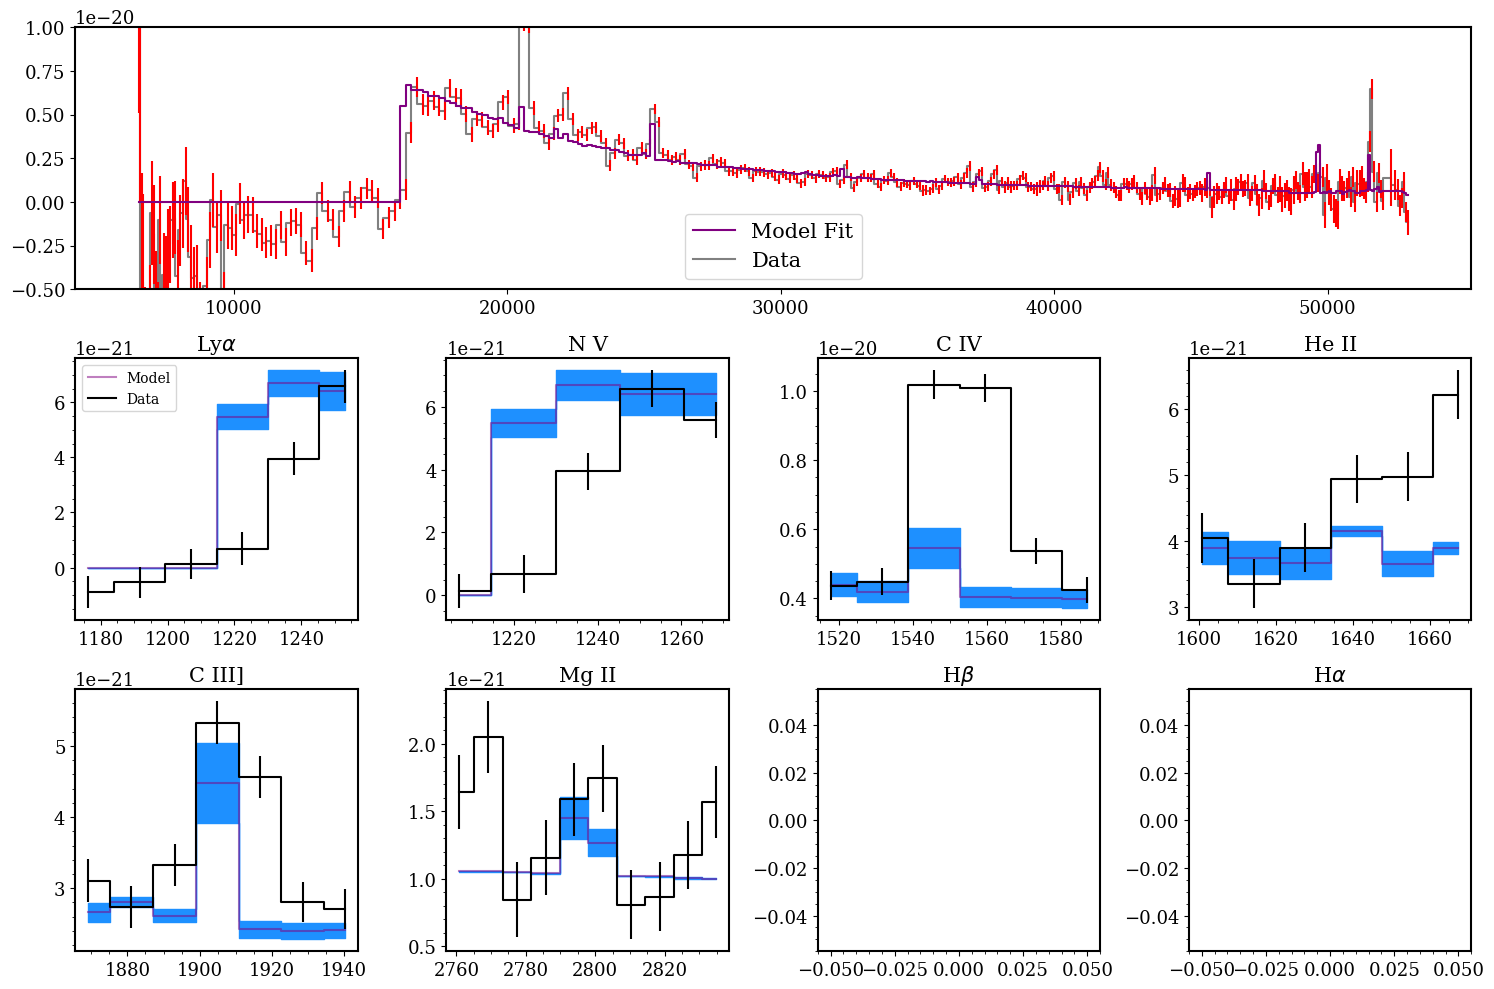

In [32]:
fig, axes = plot_spectra_and_zoom_ins(bgl_output, wave*1e10, flux, fluxerr)

In [132]:
def plot_spectra_and_agn_fraction(bgl_output, data_wave, data_flux, data_flux_err):

    l16, med, u84 = np.percentile(bgl_output['marg_sed'], q = (16, 50, 84), axis = 0)

    # Create a figure
    fig = plt.figure(figsize=(15, 10))
    
    # Create a grid with 3 rows and 4 columns using gridspec
    gs = fig.add_gridspec(3, 4)
    
    # Top row: single long plot spanning all 4 columns
    ax1 = fig.add_subplot(gs[0, :])  # Span all columns in the first row
    ax1.step(bgl_output['marg_wvln'], med, color = 'purple', label = 'Model Fit', zorder = 10)
    ax1.step(data_wave, data_flux, color = 'gray', label = "Data")
    ax1.errorbar(data_wave, data_flux, yerr = data_flux_err, color = 'red', fmt = 'none')
    ax1.set_ylim(-0.5e-20, 1e-20)
    ax1.legend(fontsize = 15)
    
    # Second row: 4 plots
    line1 = 1215.67 #lya
    window1 = 40
    ax2 = fig.add_subplot(gs[1, 0])
    bgl_output.plot_agn_ratio_convolved_per_line(line1, window1, ax = ax2)
    ax2.set_xlabel('')
    ax2.set_title(r'Ly$\alpha$', fontsize = 15)
    ax2.minorticks_on()
    #(x, y3)
    
    #ax2.set_title('tan(x)')
    line2 = 1549 #CIV
    window2 = 40
    ax3 = fig.add_subplot(gs[1, 2])
    bgl_output.plot_agn_ratio_convolved_per_line(line2, window2, ax = ax3)
    ax3.set_ylabel('')
    ax3.set_xlabel('')
    ax3.set_title('C IV', fontsize = 15)
    #ax3.plot(x, y4)
    #ax3.set_title('sinh(x)')
    
    line3 = 1640 #HeII
    window3 = 40
    ax4 = fig.add_subplot(gs[1, 3])
    bgl_output.plot_agn_ratio_convolved_per_line(line3, window3, ax = ax4)
    ax4.set_ylabel('')
    ax4.set_xlabel('')
    ax4.set_title('He II', fontsize = 15)
    #ax4.set_title('cosh(x)')
    
    line4 = 1240 #NV
    window4 = 40
    ax5 = fig.add_subplot(gs[1, 1])
    bgl_output.plot_agn_ratio_convolved_per_line(line4, window4, ax = ax5)
    ax5.set_ylabel('')
    ax5.set_xlabel('')
    ax5.set_title(r'N V', fontsize = 15)
    #ax5.set_title('tanh(x)')
    
    line5 = 1909 #CIII
    window5 = 40
    # Third row: 4 plots
    ax6 = fig.add_subplot(gs[2, 0])
    bgl_output.plot_agn_ratio_convolved_per_line(line5, window5, ax = ax6)
    ax6.set_title('C III]', fontsize = 15)
    #ax6.set_title('log(x + 1)')
    
    line6 = 2798 #MgII
    window6 = 40
    ax7 = fig.add_subplot(gs[2, 1])
    bgl_output.plot_agn_ratio_convolved_per_line(line6, window6, ax = ax7)
    ax7.set_ylabel('')
    ax7.set_title('Mg II', fontsize = 15)
    #ax7.set_title('exp(x/5)')
    
    line7 = 4863 #Hbeta
    window7 = 40
    ax8 = fig.add_subplot(gs[2, 2])
    bgl_output.plot_agn_ratio_convolved_per_line(line7, window7, ax = ax8)
    ax8.set_ylabel('')
    ax8.set_title(r'H$\beta$', fontsize = 15)
    #ax8.set_title('sin(x) + cos(x)')
    
    line8 = 6563
    window8 = 40
    ax9 = fig.add_subplot(gs[2, 3])
    bgl_output.plot_agn_ratio_convolved_per_line(line8, window8, ax = ax9)
    ax9.set_ylabel('')
    ax9.set_title(r'H$\alpha$', fontsize = 15)
    #ax9.plot(x, -y1)
    #ax9.set_title('-sin(x)')
    
    # Adjust layout for better spacing
    plt.tight_layout()

    return fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

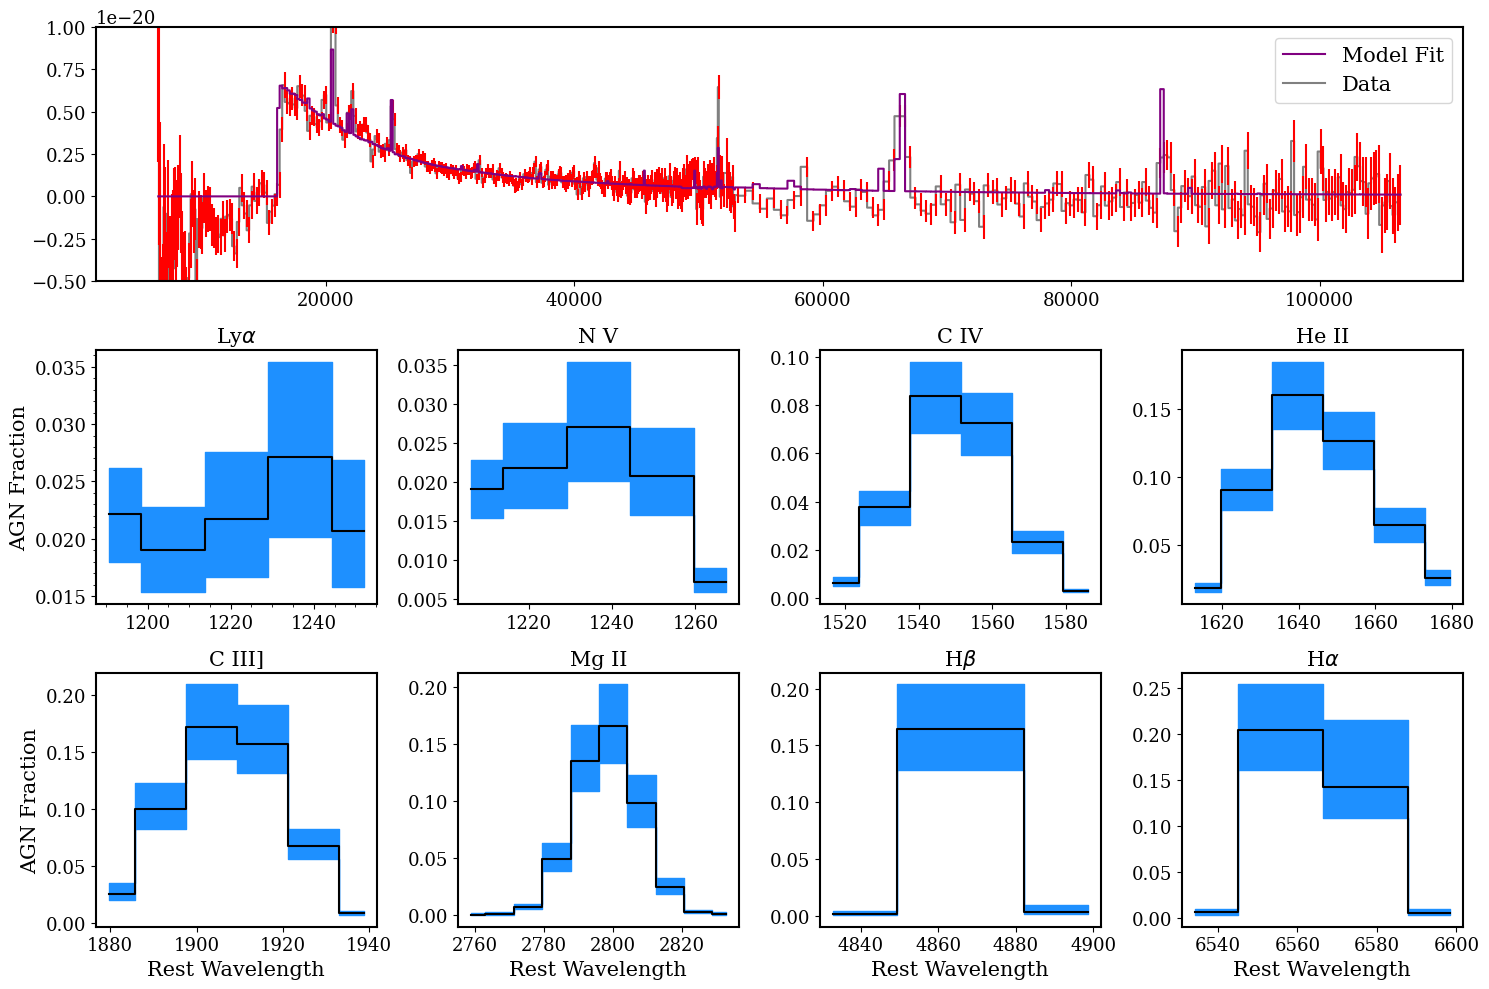

In [133]:
fig, axes = plot_spectra_and_agn_fraction(bgl_output, R_wave_angstrom, tb['flux'], tb['fluxerr'])

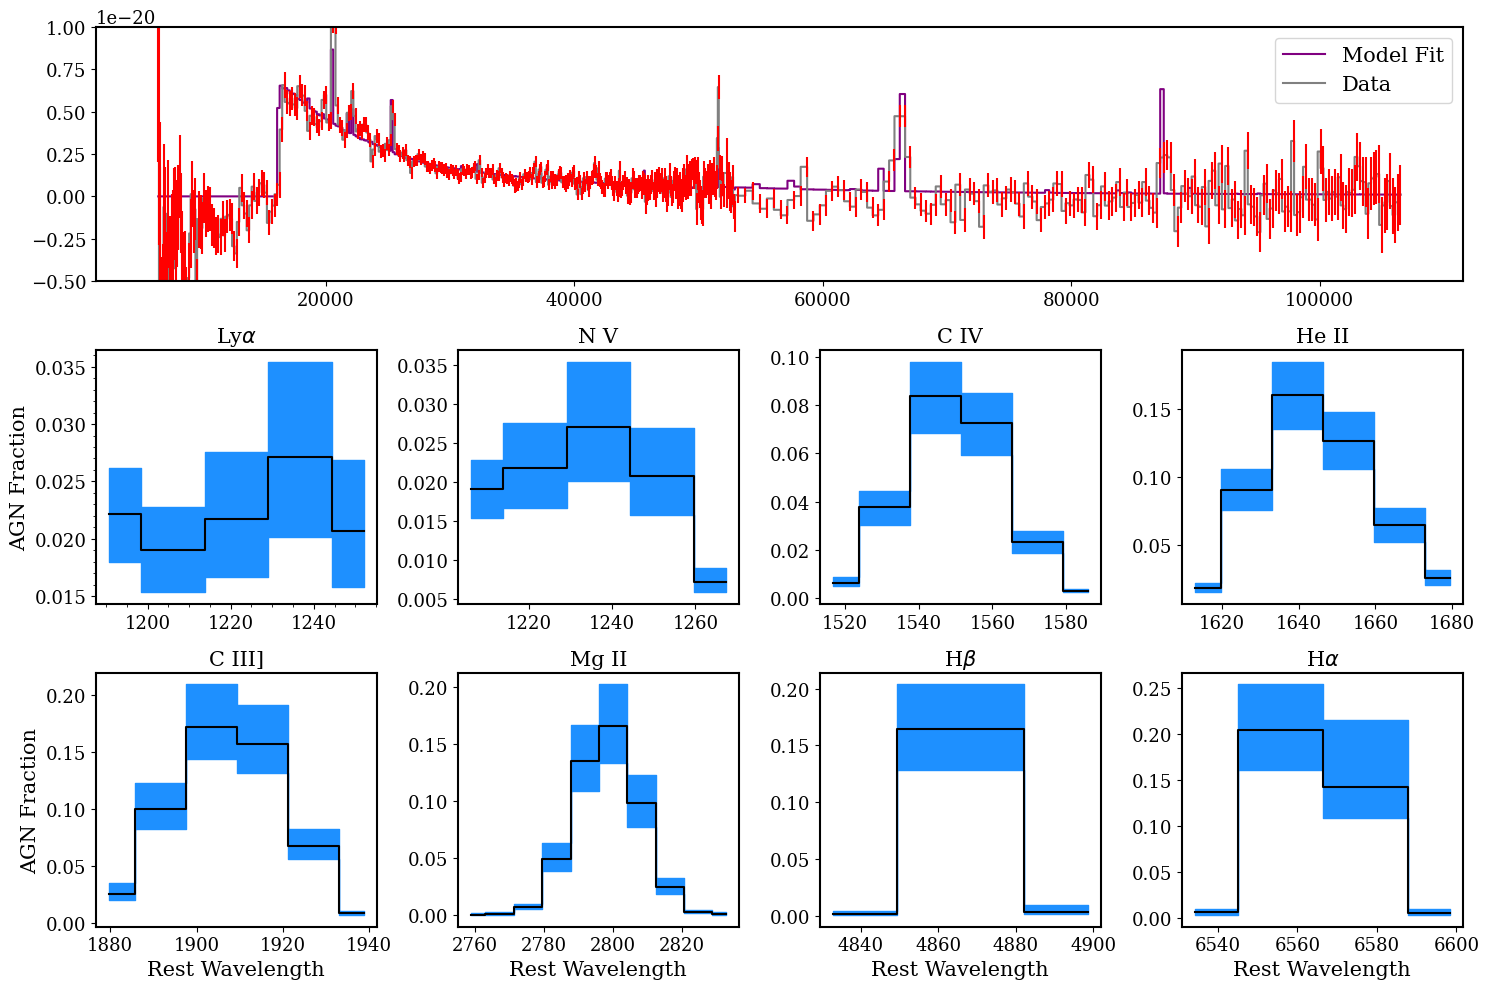

In [126]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure
fig = plt.figure(figsize=(15, 10))

# Create a grid with 3 rows and 4 columns using gridspec
gs = fig.add_gridspec(3, 4)

# Top row: single long plot spanning all 4 columns
ax1 = fig.add_subplot(gs[0, :])  # Span all columns in the first row
ax1.step(bgl_output['marg_wvln'], med, color = 'purple', label = 'Model Fit')
ax1.step(R_wave_angstrom, tb['flux'], color = 'gray', label = "Data")
ax1.errorbar(R_wave_angstrom, tb['flux'], yerr = tb['fluxerr'], color = 'red', fmt = 'none')
ax1.set_ylim(-0.5e-20, 1e-20)
ax1.legend(fontsize = 15)

# Second row: 4 plots
line1 = 1215.67 #lya
window1 = 40
ax2 = fig.add_subplot(gs[1, 0])
bgl_output.plot_agn_ratio_convolved_per_line(line1, window1, ax = ax2)
ax2.set_xlabel('')
ax2.set_title(r'Ly$\alpha$', fontsize = 15)
ax2.minorticks_on()
#(x, y3)

#ax2.set_title('tan(x)')
line2 = 1549 #CIV
window2 = 40
ax3 = fig.add_subplot(gs[1, 2])
bgl_output.plot_agn_ratio_convolved_per_line(line2, window2, ax = ax3)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_title('C IV', fontsize = 15)
#ax3.plot(x, y4)
#ax3.set_title('sinh(x)')

line3 = 1640 #HeII
window3 = 40
ax4 = fig.add_subplot(gs[1, 3])
bgl_output.plot_agn_ratio_convolved_per_line(line3, window3, ax = ax4)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_title('He II', fontsize = 15)
#ax4.set_title('cosh(x)')

line4 = 1240 #NV
window4 = 40
ax5 = fig.add_subplot(gs[1, 1])
bgl_output.plot_agn_ratio_convolved_per_line(line4, window4, ax = ax5)
ax5.set_ylabel('')
ax5.set_xlabel('')
ax5.set_title(r'N V', fontsize = 15)
#ax5.set_title('tanh(x)')

line5 = 1909 #CIII
window5 = 40
# Third row: 4 plots
ax6 = fig.add_subplot(gs[2, 0])
bgl_output.plot_agn_ratio_convolved_per_line(line5, window5, ax = ax6)
ax6.set_title('C III]', fontsize = 15)
#ax6.set_title('log(x + 1)')

line6 = 2798 #MgII
window6 = 40
ax7 = fig.add_subplot(gs[2, 1])
bgl_output.plot_agn_ratio_convolved_per_line(line6, window6, ax = ax7)
ax7.set_ylabel('')
ax7.set_title('Mg II', fontsize = 15)
#ax7.set_title('exp(x/5)')

line7 = 4863 #Hbeta
window7 = 40
ax8 = fig.add_subplot(gs[2, 2])
bgl_output.plot_agn_ratio_convolved_per_line(line7, window7, ax = ax8)
ax8.set_ylabel('')
ax8.set_title(r'H$\beta$', fontsize = 15)
#ax8.set_title('sin(x) + cos(x)')

line8 = 6563
window8 = 40
ax9 = fig.add_subplot(gs[2, 3])
bgl_output.plot_agn_ratio_convolved_per_line(line8, window8, ax = ax9)
ax9.set_ylabel('')
ax9.set_title(r'H$\alpha$', fontsize = 15)
#ax9.plot(x, -y1)
#ax9.set_title('-sin(x)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [89]:
# line = 6564
# width = 500
# plt.figure(figsize = (10, 5), facecolor = 'white', constrained_layout = True)
# plt.step(R_wave_angstrom, med, zorder = 10, color = 'black')
# plt.fill_between(R_wave_angstrom, y1 = u84, y2 = l16, color = 'dodgerblue')
# #plt.step(tb['wav']*1e10, tb['flux'], color = 'red', label = "Data", alpha = 0.75)
# plt.xlim(line*(1+z) - width*(1+z), line*(1+z) + width*(1+z))
# #plt.ylim(-.1e-19, .5e-19)
# #plt.legend()
# plt.axvline(line*(1+z), linestyle = '--', color = 'red')
# plt.show()

In [11]:
# fig, ax = bgl_output.plot_SEDs()
# ax.set_ylim(1e-34, 1e-26)
# #ax.set_xlim(1e4, 1e7)
# ylabel = r'F$_{\nu}$ [erg s$^{-1}$ cm$^{-2}$ $Hz^{-1}$]'
# ax.set_ylabel(ylabel, fontsize = 15)
# ax.legend(loc = 'lower right')
# plt.show()

In [49]:
# fig, ax = bgl_output.plot_SEDs()
# ax.set_ylim(1e-32, 1e-27)
# ax.set_xlim(1e4, 1e5)
# ylabel = r'F$_{\nu}$ [erg s$^{-1}$ cm$^{-2}$ $Hz^{-1}$]'
# ax.set_ylabel(ylabel, fontsize = 15)
# ax.legend(loc = 'lower right')
# plt.show()

In [50]:
# fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 10))

# top_ax = ax[0]
# middle_ax = ax[1]
# bottom_ax = ax[-1]

# spec_2D = bgl_output['full_sed']
# agn_sed = bgl_output['agn_sed']
# wvln = bgl_output['full_sed_wvln']

# l16, med, u84 = np.percentile(spec_2D, q = (16, 50, 84), axis = 0)
# l16_agn, med_agn, u84_agn = np.percentile(agn_sed, q = (16, 50, 84), axis = 0)

# difference = spec_2D - agn_sed

# l16_diff, med_diff, u84_diff = np.percentile(difference, q = (16, 50, 84), axis = 0)

# top_ax.fill_between(wvln, y1 = u84, y2 = l16, 
#                         color = '#54278f', alpha = 0.5, label = 'Full SED')

# middle_ax.fill_between(wvln, y1 = u84_agn, y2 = l16_agn, 
#                 color = '#fb6a4a', alpha = 0.5, label = 'AGN_SED')

# bottom_ax.fill_between(wvln, y1 = u84_diff, y2 = l16_diff, 
#                 color = '#7bccc4', alpha = 0.7, label = 'Difference SED')

# top_ax.set_xscale('log')
# top_ax.set_yscale('log')

# middle_ax.set_xscale('log')
# middle_ax.set_yscale('log')

# bottom_ax.set_xscale('log')
# bottom_ax.set_yscale('log')

# top_ax.set_ylim(1e-30, 1e-27)

# bottom_ax.set_ylim(1e-30, 1e-27)

In [1]:
#np.log10(bgl_output['agn_emission']['HBaA_6563_lum_obs'])

In [11]:
# bgl_output['full_line_info']['HBaA_6563_lum_obs']

In [28]:
import seaborn as sb

In [51]:
# fontsize = 15
# fig,ax = plt.subplots(figsize = (10, 5), constrained_layout = True, facecolor = 'white')

# agn_fraction_df['HBaA_6563_lum_obs'].hist(bins = np.arange(0, 1.1, .05), ax= ax, color = '#253494', zorder = 10)
# ax.grid(color = 'black', linestyle = '--', )
# ax.set_xlabel(r'H$\alpha$ AGN Fraction', fontsize = fontsize)
# ax.set_ylabel('Number Counts', fontsize = fontsize)
# ax.set_xlim(0, 1.01)
# ax.set_ylim(0, 1050)

In [9]:
full_sed = bgl_output['full_sed']

In [10]:
agn_sed = bgl_output['agn_sed']

In [11]:
agn_fraction_sed = agn_sed/full_sed

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_54457/3095392414.py:1: RuntimeWarning: invalid value encountered in divide
  agn_fraction_sed = agn_sed/full_sed


In [12]:
sed_wvln = bgl_output['full_sed_wvln']

In [21]:
def finding_agn_faction_line(input_line, sed_wvln, agn_fraction, window_pixel = 5, plot_window = False):
    
    idx = np.argmin(np.abs(input_line - sed_wvln))
    
    line_fraction = agn_fraction[:, idx - window_pixel : idx+window_pixel]
    wvlns = sed_wvln[idx - window_pixel : idx+window_pixel]

    if plot_window:
        print(len(wvlns))
        
        l16, med, u84 = np.percentile(line_fraction,  q = (16, 50, 84), axis = 0)
        #print(line_fraction.shape)
        #print(l16.shape)
        
        fig, ax = plt.subplots(figsize = (12, 7))
        ax.step(wvlns, med, color = 'black')
        ax.fill_between(wvlns, y1 = u84, y2 = l16, color = 'salmon')
        ax.set_xlabel(r'Wavelength [$\AA$]', fontsize = 15)
        ax.set_ylabel(r'AGN Fraction', fontsize = 15)
        #plt.show()
        return line_fraction, wvlns, idx, fig, ax 
    else:    
        return line_fraction, wvlns, idx

In [14]:
tb = Table.read('data/spectra/1395_Merge_Spectra_w_Rkms.fits')

In [19]:
fnu, fnu_err = bgl_output.convert_spectra_to_fnu(tb['wav'], tb['flux'], tb['fluxerr'])

In [72]:
bgl_output['full_sed_wvln'] * (1+z)

array([4.960839e+01, 5.000579e+01, 5.040637e+01, ..., 2.444092e+06,
       2.493296e+06, 2.543489e+06], dtype='>f4')

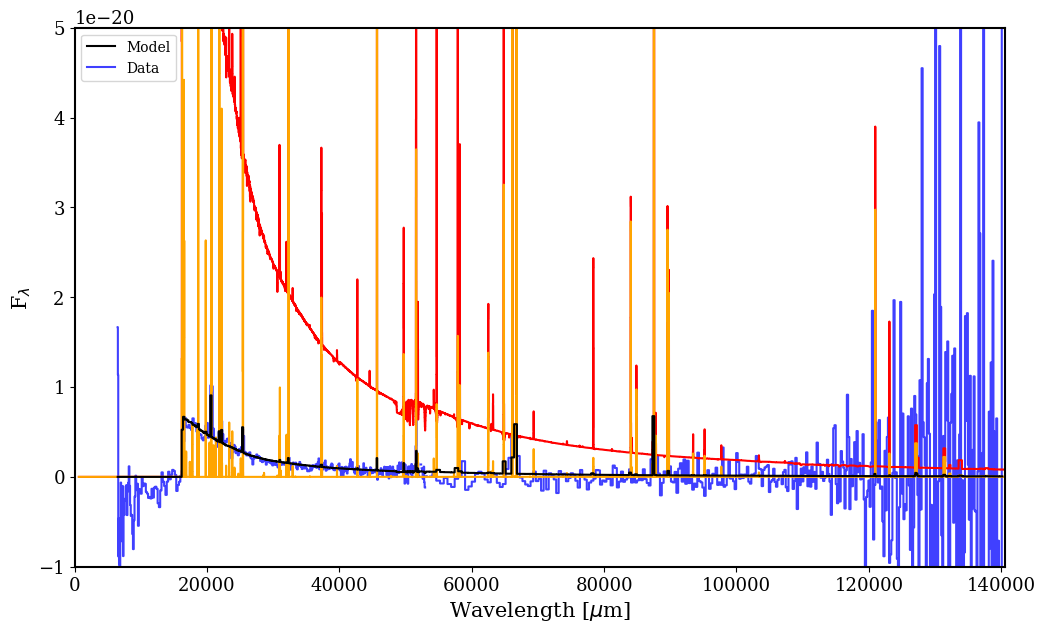

In [76]:
plt.figure(figsize = (12, 7), facecolor = 'white')
plt.step(bgl_output['marg_wvln'], bgl_output['marg_sed'][0], where = 'mid', zorder = 10,
         label = 'Model', color = 'black')
plt.step(tb['wav']*1e10, tb['flux'], where = 'mid', label = 'Data', color = 'blue', alpha = 0.75)
plt.step(bgl_output['full_sed_wvln'] * (1+z), bgl_output['full_sed'][0], color = 'red', where = 'mid')
plt.step(bgl_output['full_sed_wvln'] * (1+z), bgl_output['agn_sed'][0], color = 'orange', where = 'mid')

plt.ylim(-0.1e-19, 0.5e-19)
plt.xlabel(r'Wavelength [$\mu$m]', fontsize = 15)
plt.ylabel(r'F$_{\lambda}$', fontsize = 15)
plt.xlim(0, 140500)
plt.legend()

In [82]:
R_wave_angstrom = wave *1e10

In [86]:
idx_in_range = np.where(((R_wave_angstrom[0] < obs_wave_full_sed) & (obs_wave_full_sed < R_wave_angstrom[-1])))[0]

In [110]:
convolved_fluxes = np.zeros((len(bgl_output['full_sed']), len(idx_in_range)))
convolved_agn = np.zeros((len(bgl_output['full_sed']), len(idx_in_range)))

for i in range(len(bgl_output['full_sed'])):
    flux_convolved = bgl_output.convolve_model_spec(R_wave_angstrom, R, obs_wave_full_sed[idx_in_range], bgl_output['full_sed'][i][idx_in_range])
    agn_convolved = bgl_output.convolve_model_spec(R_wave_angstrom, R, obs_wave_full_sed[idx_in_range], bgl_output['agn_sed'][i][idx_in_range])

    convolved_fluxes[i] = flux_convolved
    convolved_agn[i] = agn_convolved

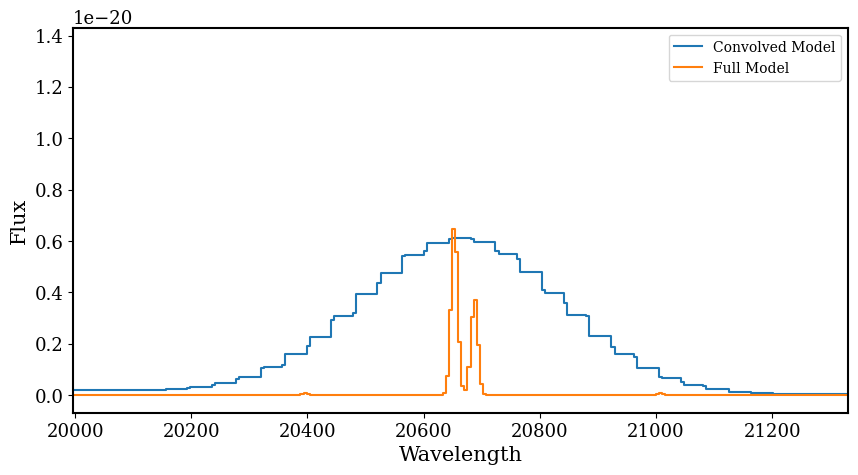

In [128]:
plt.figure(figsize = (10, 5), facecolor = 'white')
#plt.plot(obs_wave_full_sed[idx_in_range], flux_convolved)
plt.step(obs_wave_full_sed[idx_in_range], agn_convolved, where = 'mid', label = 'Convolved Model')
plt.xlim(1549*(1+z) - 50*(1+z), 1549*(1+z) + 50*(1+z))
plt.step(obs_wave_full_sed[idx_in_range], bgl_output['agn_sed'][0][idx_in_range]/50, where = 'mid', label = 'Full Model')
plt.ylabel('Flux', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.legend()
plt.show()

In [91]:
ratio = agn_convolved/flux_convolved

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_54457/1026019524.py:1: RuntimeWarning: invalid value encountered in divide
  ratio = agn_convolved/flux_convolved


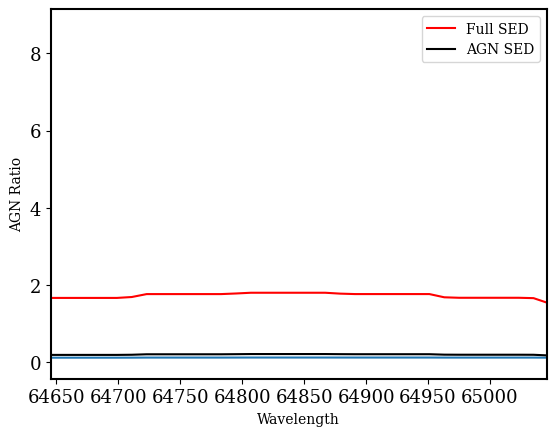

In [107]:
plt.figure()
plt.plot(obs_wave_full_sed[idx_in_range], ratio)
plt.plot(obs_wave_full_sed[idx_in_range], flux_convolved*1e20, label = 'Full SED', color = 'red')
plt.plot(obs_wave_full_sed[idx_in_range], agn_convolved*1e20, label = 'AGN SED', color = 'black')
plt.ylabel('AGN Ratio')
plt.xlabel('Wavelength')
plt.xlim(4861*(1+z) - 15*(1+z), 4861*(1+z) + 15*(1+z))
plt.legend()

In [74]:
obs_wave_full_sed = bgl_output['full_sed_wvln'] * (1+z)

Text(0.5, 0, 'Wavelength')

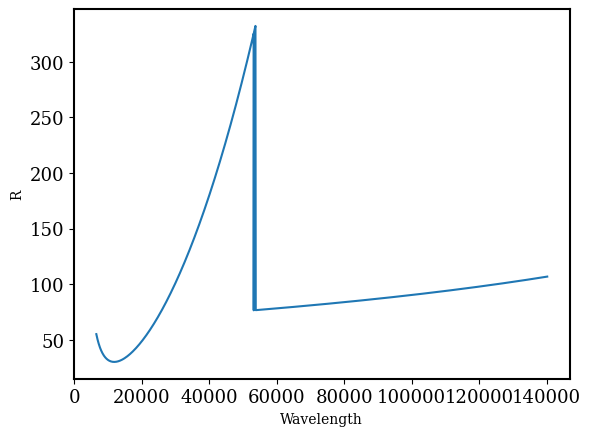

In [81]:
plt.figure()
plt.plot(wave*1e10, R)
plt.ylabel('R')
plt.xlabel('Wavelength')

In [15]:
obs_wavl = (bgl_output['full_sed_wvln'] * (1+z))

In [ ]:
np.where()

In [16]:
marg_wave = bgl_output['marg_wvln']

In [31]:
len(idx[0])

4057

In [57]:
obs_wave = bgl_output['full_sed_wvln']* (1+z)


In [58]:
idx = np.where(((marg_wave[0] < obs_wave) & (marg_wave[-1] > obs_wave)))

In [59]:
in_range = obs_wave[idx]

In [47]:
bgl_output['agn_sed'][0][idx]

1.03677564e-19

In [44]:
len(bgl_output['agn_sed'][0][idx])

TypeError: object of type 'numpy.float32' has no len()

In [60]:
flux_stellar = bgl_output.convolve_model_spec(wave*1e10, R, in_range, bgl_output['full_sed'][0][idx])

In [61]:
flux_agn     = bgl_output.convolve_model_spec(wave*1e10, R, in_range, bgl_output['agn_sed'][0][idx])

In [65]:
wave*1e10

6523.575668858432
6579.346467593399
6636.414500097303
6694.813743960082
6754.677501147499
6816.059356939515
6878.894489500486
6943.214728281398
7009.2300441565585
7076.935940568909
7146.251124029546


In [62]:
agn_ratio = flux_agn/flux_stellar

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_54457/4183913494.py:1: RuntimeWarning: invalid value encountered in divide
  agn_ratio = flux_agn/flux_stellar


In [68]:
1549*(1+z)

20663.660236358643

20


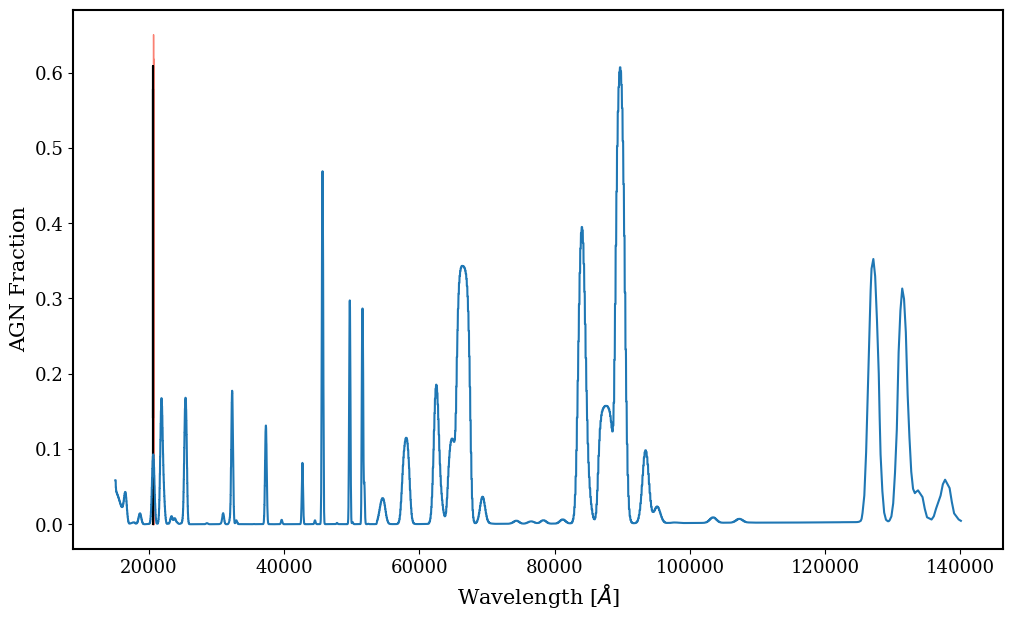

In [69]:
lines, wvlns, idx, fig, ax = finding_agn_faction_line(1549*(1+z), obs_wavl, agn_fraction_sed, 10, plot_window=True)

ax.plot(in_range, agn_ratio)
#ax.set_xlim(20610, 20720)
#l16, med, u84 = np.percentile(lines, q = (16, 50, 84), axis = 1)

In [27]:
def finding_agn_fraction_per_line(line_array, sed_wvln, agn_fraction_sed):

    line_frac = {}
    for l in line_array:
        
        lines, wvlns, idx = finding_agn_faction_line(3727, sed_wvln, agn_fraction_sed)

        l16, med, u84 = np.percentile(lines, q = (16, 50, 84), axis = 1)
        line_frac[f'{int(l)}_l16'] = l16
        line_frac[f'{int(l)}_med'] = med
        line_frac[f'{int(l)}_u84'] = u84

    return line_frac

In [11]:
line_dict = finding_agn_fraction_per_line([3727, 3729, 4863, 5007, 6564], sed_wvln, agn_fraction_sed)

In [28]:
pd.DataFrame(line_dict).median()

3727_l16    0.044661
3727_med    0.245814
3727_u84    0.350900
3729_l16    0.044661
3729_med    0.245814
3729_u84    0.350900
4863_l16    0.044661
4863_med    0.245814
4863_u84    0.350900
5007_l16    0.044661
5007_med    0.245814
5007_u84    0.350900
6564_l16    0.044661
6564_med    0.245814
6564_u84    0.350900
dtype: float64

In [15]:
def make_agn_fraction_hist(agn_fraction_2darr, window = True, line = False):

    if window and not line:
        l16, med, u84 = np.percentile(lines, q = (16, 50, 84), axis = 1)

    elif line and not window:
        l16, med, u84 = np.percentile(lines[:, 5], q = (16, 50, 84))

    fig, ax = plt.subplots(figsize = (10, 5), constrained_layout = True, facecolor = 'white', dpi = 150)
    
    ax.hist(med, rwidth=0.85, color='#0504aa', zorder = 1)
    ax.set_xlabel('AGN Fraction', fontsize = 15)
    ax.set_ylabel('Counts', fontsize = 15)

    ax.set_xlim(0, 1.05)
    ax.grid(axis='y', alpha=0.75, ls = ':')
    ax.minorticks_on()

    return fig, ax 

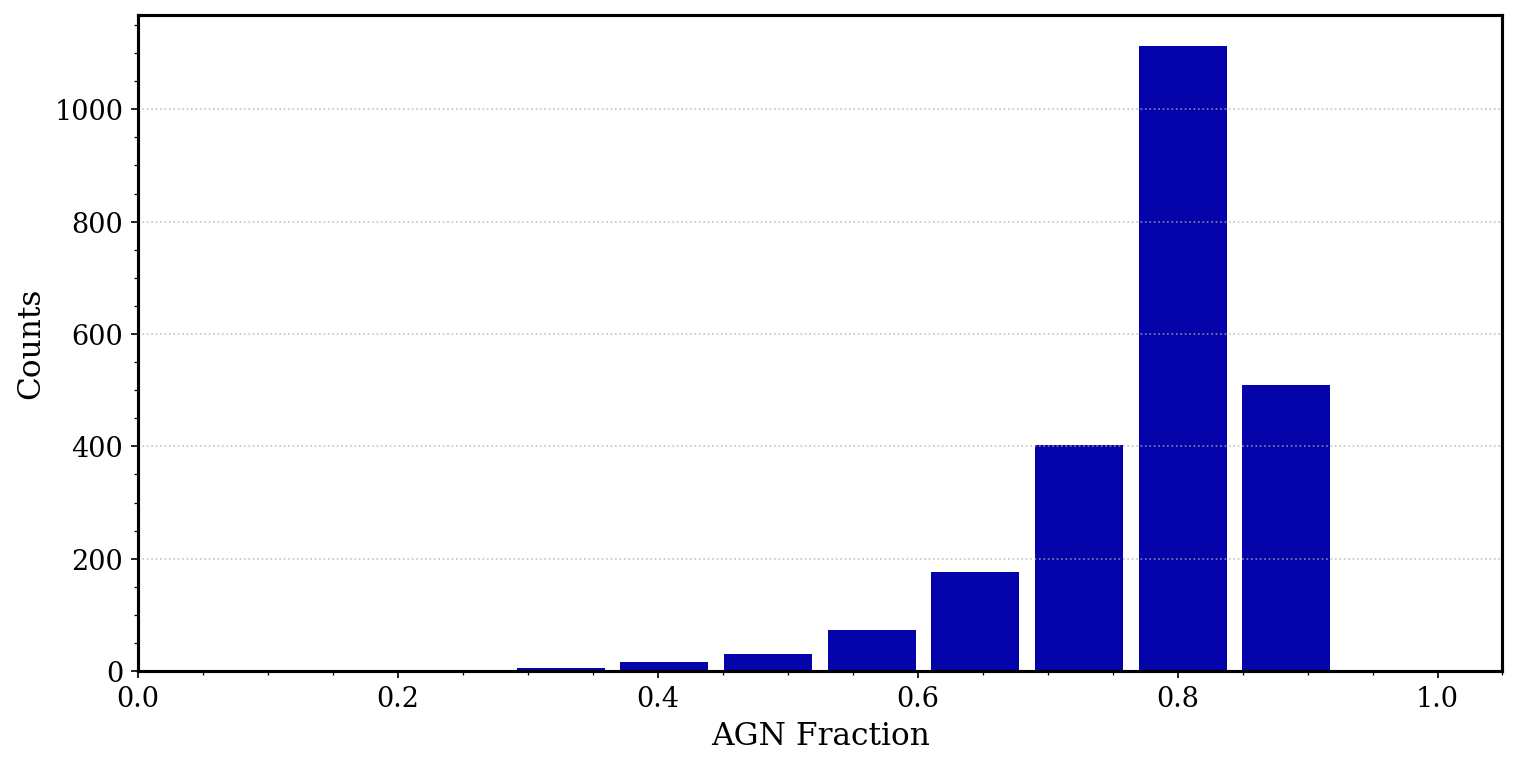

In [94]:
fig, ax = make_agn_fraction_hist(lines)

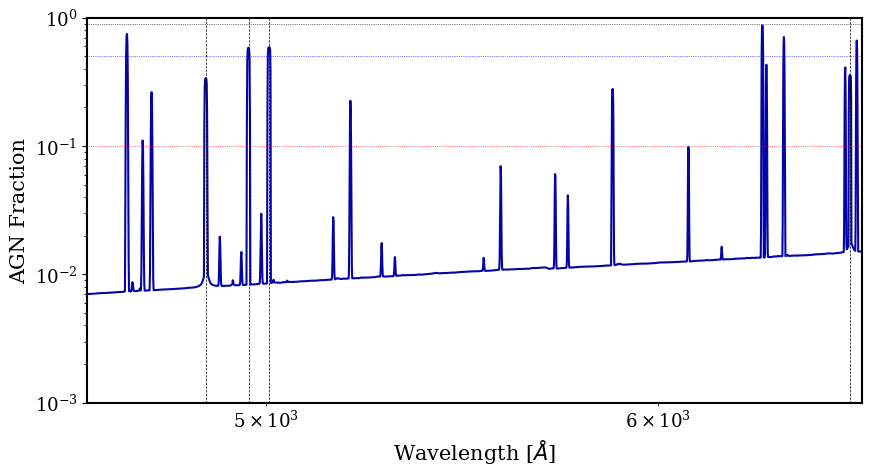

In [104]:
plt.figure(figsize = (10, 5), facecolor = 'white')

plt.loglog(sed_wvln, agn_fraction_sed[100], color = '#0504aa')
plt.ylim(1e-3, 1) 
plt.xlim(4600, 6600)

plt.axvline(6564, color = 'black', ls = '--', lw = 0.5)
plt.axvline(5007, color = 'black', ls = '--', lw = 0.5)
plt.axvline(4960, color = 'black', ls = '--', lw = 0.5)
plt.axvline(4861, color = 'black', ls = '--', lw = 0.5)

plt.axhline(0.1, color = 'red', lw = 0.5, ls = ':')
plt.axhline(0.5, color = 'blue', lw = 0.5, ls = ':')
plt.axhline(0.9, color = 'black', lw = 0.5, ls = ':')
plt.xlabel(r'Wavelength [$\AA$]', fontsize = 15)
plt.ylabel('AGN Fraction', fontsize = 15)
plt.show()

In [ ]:
colors = ['#0504aa', '#607c8e'] 311 degree v3_PA

(-1e-29, 2e-29)

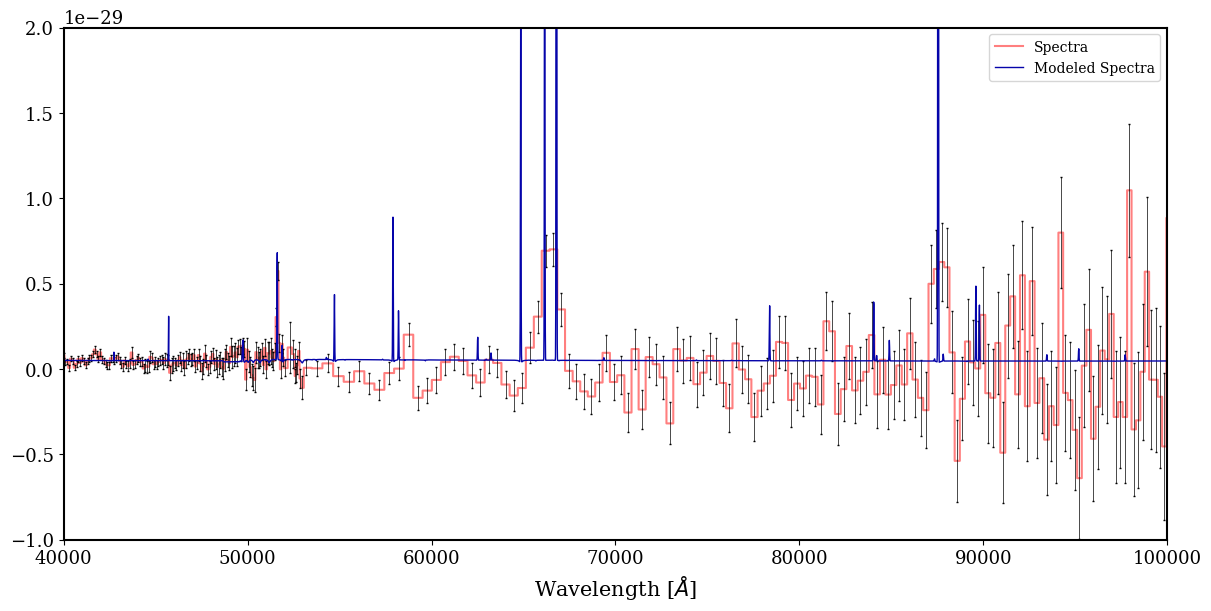

In [12]:
fig, ax = bgl_output.plotting_model_spectra_w_actual_spectra('data/spectra/1395_Merge_Spectra.fits')

ax.set_xlim(40000, 100000)
ax.set_ylim(-1e-29, 2e-29)

In [67]:
spec_wave, spec_flux, spec_fluxerr = bgl_output.getting_spec_quantities('data/spectra/1395_Merge_Spectra.fits')

In [65]:
wvln, spec_2D = bgl_output['full_sed_wvln'], bgl_output['full_sed']
z = bgl_output['z']
obs_wvln = wvln * (1+z)

In [69]:
c_m_s = 3e8
c_A_s = c_m_s * 1e10
fnu_conversion_factor = obs_wvln**2/c_A_s
spec_2D = spec_2D * fnu_conversion_factor
spec_flux, spec_fluxerr = bgl_output.convert_spectra_to_fnu(spec_wave, spec_flux, spec_fluxerr)

In [70]:
wave_mask = (np.amin(spec_wave) < obs_wvln) & (obs_wvln < np.amax(spec_wave))
spec_2D = spec_2D.T[wave_mask].T
reduced_wvln = obs_wvln[wave_mask]
xlabel = r'Wavelength [$\AA$]'
l16, med, u84 = np.percentile(spec_2D, q = (16, 50, 84), axis = 0)

In [94]:
# fig, ax = bgl_output.generate_plot_setup()
        
# # ax.step(spec_wave, spec_flux, 
# #         where = 'mid', color = 'red', label = 'Spectra')

# # ax.errorbar(spec_wave, spec_flux, 
# #             yerr = spec_fluxerr, 
# #             fmt = 'none', capsize=1, elinewidth = 0.5, 
# #             ecolor = "black")

# ax.fill_between(reduced_wvln, y1 = u84, y2 = l16, 
#                 color = 'blue', alpha = 0.7)
# ax.plot(reduced_wvln, med, color = 'black', lw = 0.5, label = 'Modeled Spectra')
# ax.set_xlabel(xlabel, fontsize = 15)
# ax.legend()

In [95]:
# plt.plot(obs_wvln, spec_2D[1])

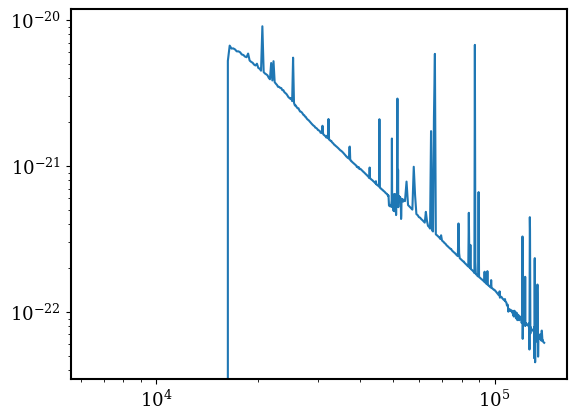

In [13]:
plt.loglog(bgl_output['marg_wvln'], bgl_output['marg_sed'][0])

In [15]:
fnu_marg_sed, _ = bgl_output.convert_spectra_to_fnu(bgl_output['marg_wvln'], bgl_output['marg_sed'], 1)

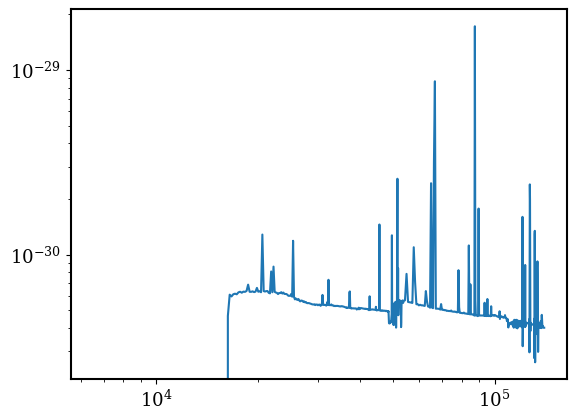

In [17]:
plt.loglog(bgl_output['marg_wvln'], fnu_marg_sed[0])

In [4]:
tab = Table.read('data/spectra/1395_Simple_NIRSpec_Spectra_w_Rkms.fits')

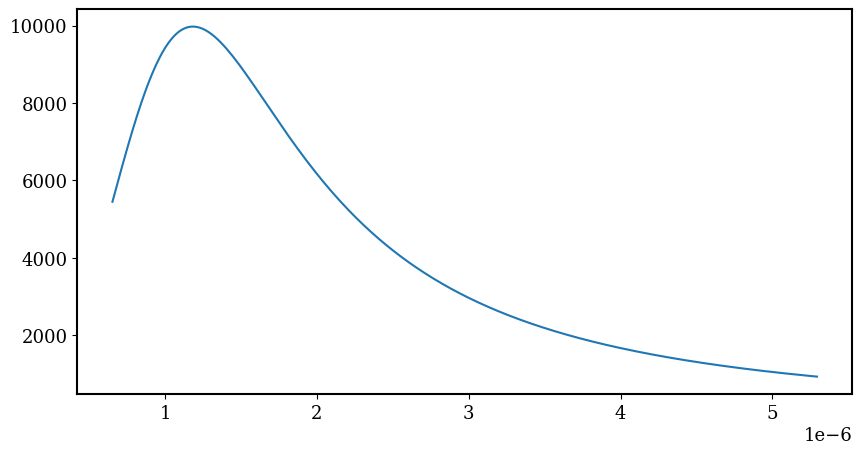

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(tab['wav'], tab['R_kms'])
plt.show()

In [11]:
tab['wav'] = tab['wav']*u.m

In [13]:
tab['flux'] = tab['flux']*u.erg/u.s/u.cm**2/u.Angstrom

In [14]:
tab['fluxerr'] = tab['fluxerr']*u.erg/u.s/u.cm**2/u.Angstrom

In [15]:
tab['R_kms'] = tab['R_kms']*u.km/u.second

In [18]:
#tab.write('data/spectra/1395_Simple_NIRSpec_Spectra_w_Rkms.fits', overwrite = True)

In [19]:
tab

wav,flux,fluxerr,R_kms
m,erg / (Angstrom s cm2),erg / (Angstrom s cm2),km / s
float64,float64,float64,float64
6.523575668858434e-07,1.6669760073347177e-20,1.1602674308870868e-20,5447.482466580238
6.5793464675934e-07,1.1357247173439475e-20,1.1309445986978556e-20,5528.2956508624075
6.636414500097303e-07,-8.855719255688848e-21,1.0530172937566936e-20,5610.9070156465905
6.694813743960083e-07,-4.617739831494254e-21,5.0616477261131965e-21,5695.3338114565295
6.754677501147499e-07,-9.741852282426758e-21,4.869132918110583e-21,5781.730596877659
6.816059356939516e-07,-1.525713281166614e-20,4.85407647561511e-21,5870.129695735066
6.878894489500487e-07,-1.5343699756072762e-20,4.493522070871548e-21,5960.370286030929
6.943214728281399e-07,-6.63682320871908e-21,3.0427469639899795e-21,6052.460135638033
